## Pneumonia Detection from Chest X-Rays

Pneumonia is a serious lung infection that inflames the air sacs, or alveoli, in one or both lungs, which may fill with fluid or pus, causing symptoms like coughing, fever, chills, and difficulty breathing. It can be caused by various pathogens, including bacteria, viruses, and fungi. Pneumonia can range from mild to life-threatening, particularly in infants, older adults, and individuals with weakened immune systems or chronic illnesses. Treatment often involves antibiotics for bacterial infections, antiviral medications for viral infections, rest, fluids, and supportive care. Vaccinations and good hygiene practices are crucial preventive measures against certain types of pneumonia.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from sklearn.model_selection import train_test_split
import cv2
import os

### About the dataset:

The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

### Importing dataset

In [2]:
# img_width, img_height = 256, 256

os.listdir("./Dataset/chest_xray")

['.DS_Store', 'test', 'chest_xray', '__MACOSX', 'train', 'val']

#### The dataset is divided into three sets:
- Train set
- Test set
- Validation set

### Data Exploration and pre-processing

In [3]:
train_dir = "./Dataset/chest_xray/train"
test_dir = "./Dataset/chest_xray/test"
val_dir = "./Dataset/chest_xray/val"

print("Train set:")
print(f"PNEUMONIA = {len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))}")
print(f"NORMAL = {len(os.listdir(os.path.join(train_dir, 'NORMAL')))}")
print("----------------------------------------")


print("Test set:")
print(f"PNEUMONIA = {len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL = {len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")
print("----------------------------------------")

print("Validation set:")
print(f"PNEUMONIA = {len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL = {len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")

Train set:
PNEUMONIA = 3875
NORMAL = 1341
----------------------------------------
Test set:
PNEUMONIA = 390
NORMAL = 234
----------------------------------------
Validation set:
PNEUMONIA = 8
NORMAL = 8


#### Sample images of train set

Images of patients with pneumonia


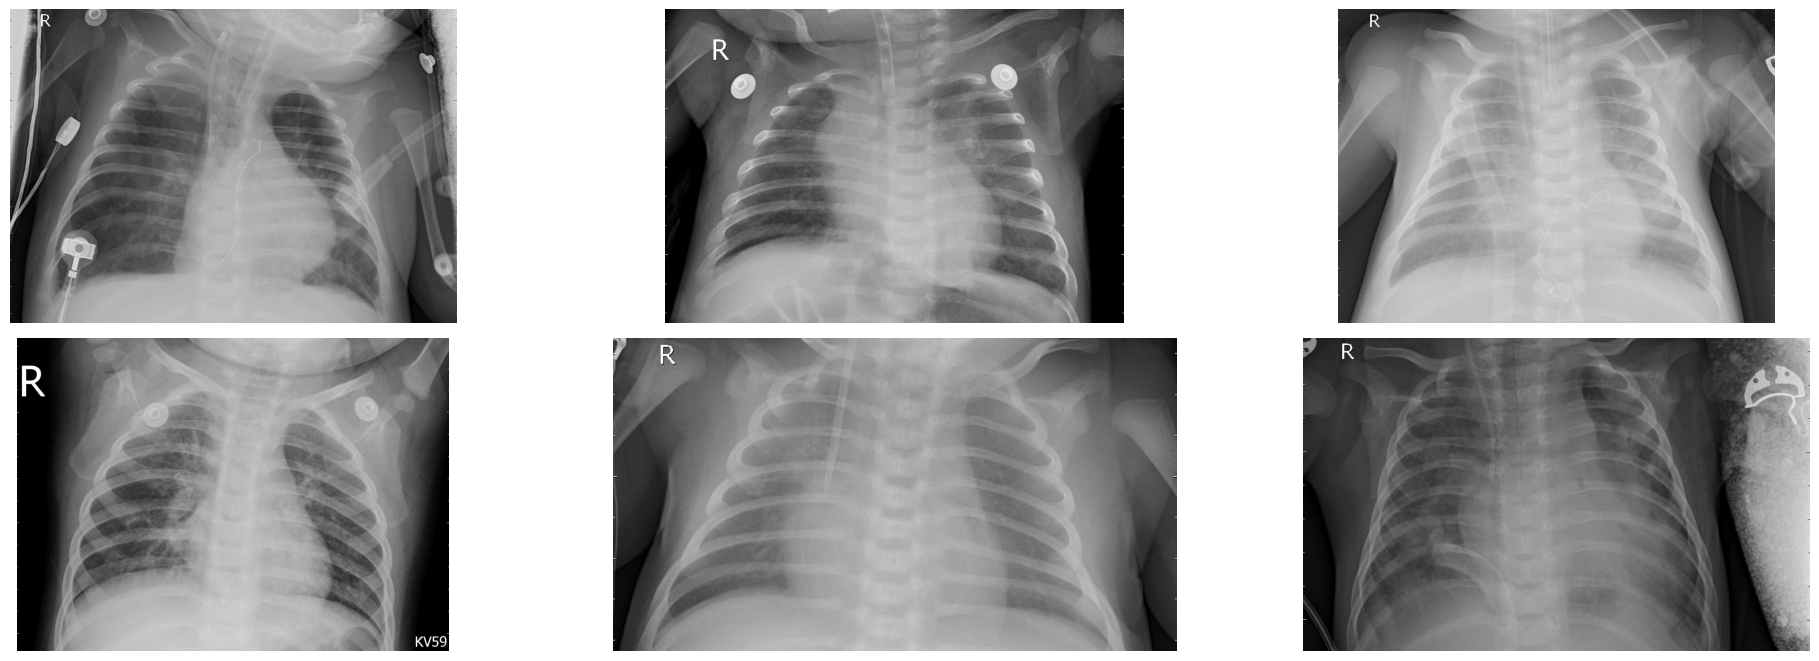

In [4]:
train_pneumonia = os.listdir("./Dataset/chest_xray/train/PNEUMONIA")
train_pneumonia_dir = "./Dataset/chest_xray/train/PNEUMONIA"

print("Images of patients with pneumonia")
plt.figure(figsize=(20, 10))

for i in range(6):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(train_pneumonia_dir, train_pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

Images of patients without pneumonia


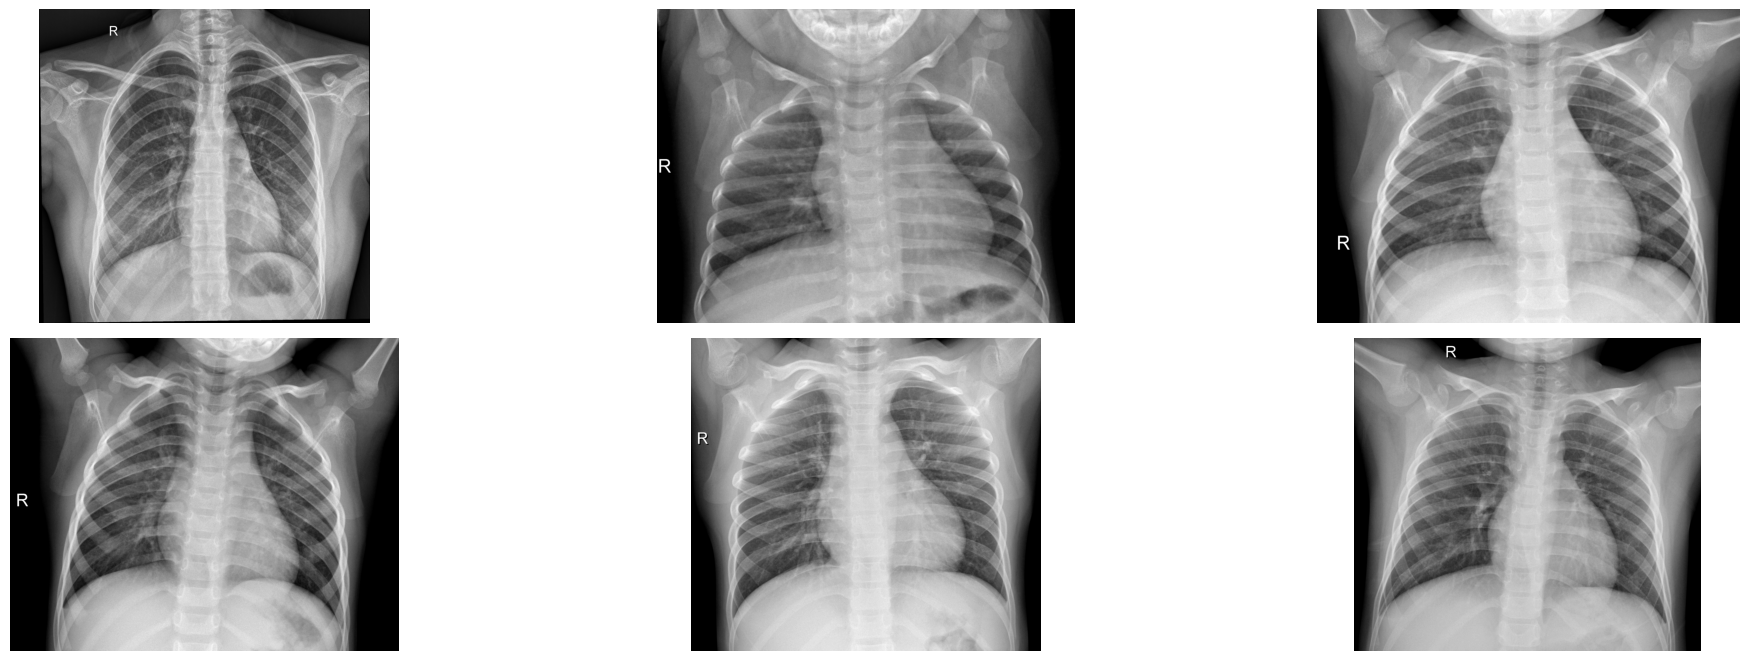

In [5]:
train_normal = os.listdir("./Dataset/chest_xray/train/NORMAL")
train_normal_dir = "./Dataset/chest_xray/train/NORMAL"

print("Images of patients without pneumonia")
plt.figure(figsize=(20, 10))

for i in range(6):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(train_normal_dir, train_normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

#### Sample images of test set 

Images of patients with pneumonia


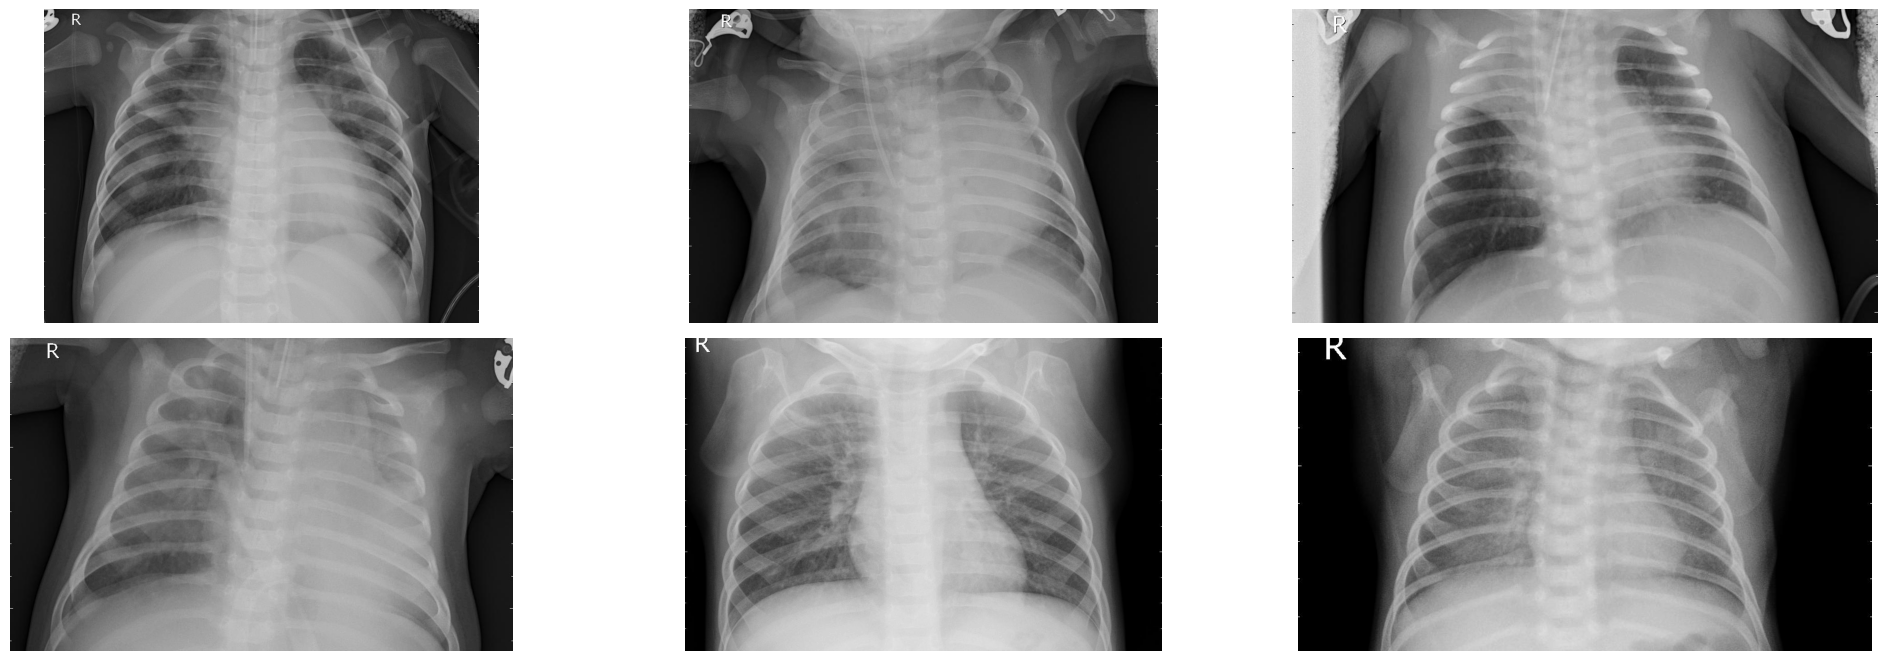

In [6]:
test_pneumonia = os.listdir("./Dataset/chest_xray/test/PNEUMONIA")
test_pneumonia_dir = "./Dataset/chest_xray/test/PNEUMONIA"

print("Images of patients with pneumonia")
plt.figure(figsize=(20, 10))

for i in range(6):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(test_pneumonia_dir, test_pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

Images of patients without pneumonia


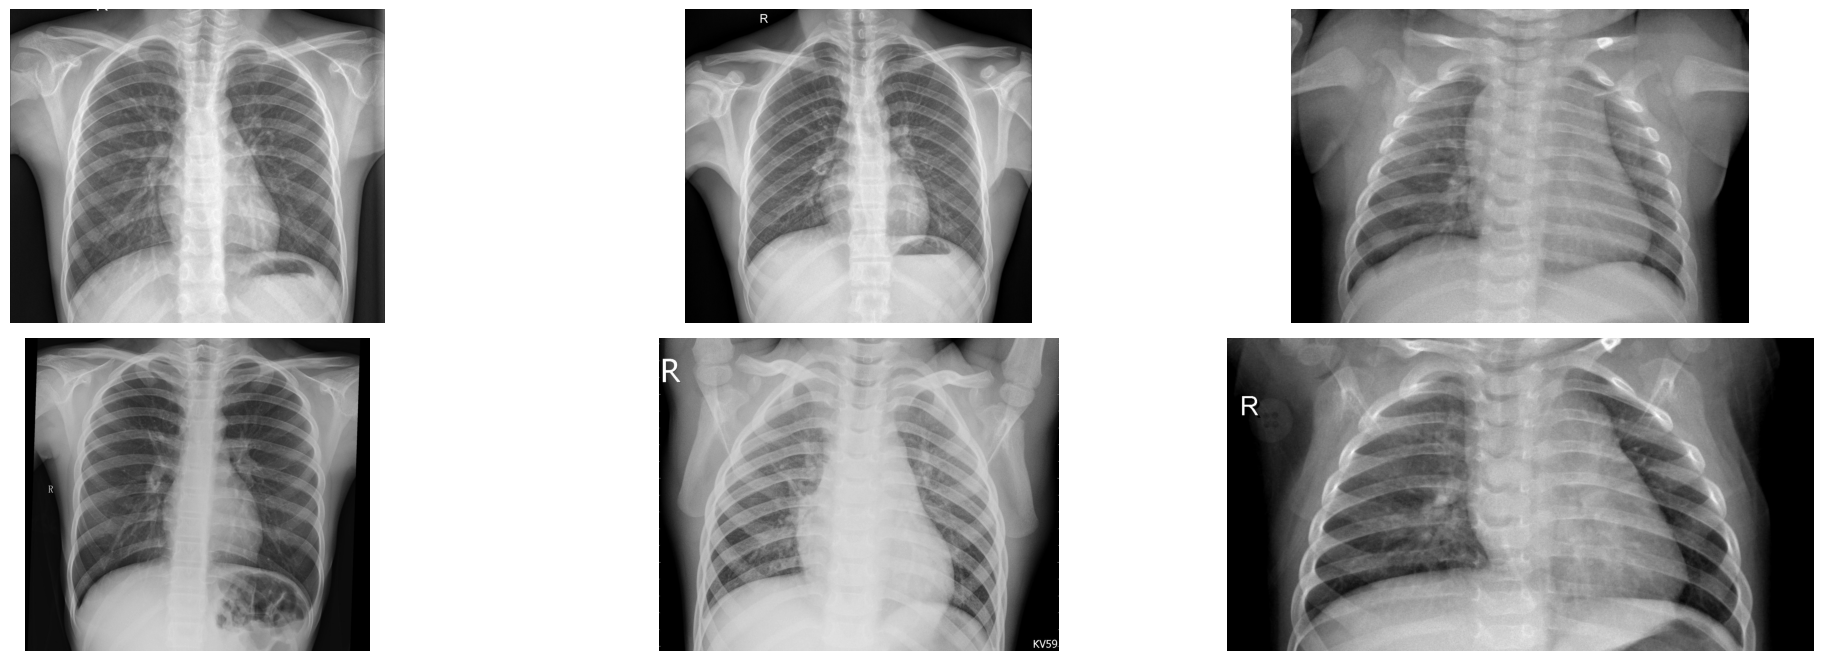

In [7]:
test_normal = os.listdir("./Dataset/chest_xray/test/NORMAL")
test_normal_dir = "./Dataset/chest_xray/test/NORMAL"

print("Images of patients without pneumonia")
plt.figure(figsize=(20, 10))

for i in range(6):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(test_normal_dir, test_normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

### Data Pre-processing and augmentation

In [8]:
image_generator = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=True,
        featurewise_std_normalization=False,
        samplewise_std_normalization=True,
        zca_whitening=False,
        rotation_range = 30,
        zoom_range = 0.2, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        horizontal_flip = True,
        vertical_flip=False
)

In [9]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(240, 240))

val = image_generator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(240, 240))

test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=2, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(240, 240))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


#### Previewing an image after augmentation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 240 pixels x 240 pixels height.


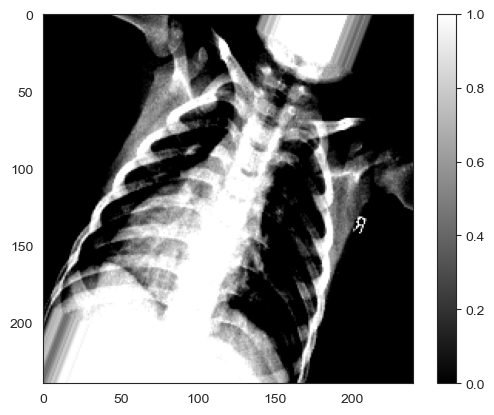

In [10]:
sns.set_style('white')
generated_image, label = train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()

print(f"The dimensions of the image are {generated_image.shape[1]} pixels x {generated_image.shape[2]} pixels height.")